In [1]:
import os
import numpy as np
import pandas as pd
import librosa
import librosa.display
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from keras.utils import to_categorical

from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation, Flatten, Conv1D, MaxPooling1D

import warnings
warnings.filterwarnings('ignore')


In [2]:
import pandas as pd
import os
ravdess_path = r'C:\Users\manas\OneDrive\Desktop\audio_dataset\RAVDESS\audio_speech_actors_01-24'

file_paths = []
emotions = []
emotion_dict = {
    '01': 'neutral',
    '02': 'calm',
    '03': 'happy',
    '04': 'sad',
    '05': 'angry',
    '06': 'fearful',
    '07': 'disgust',
    '08': 'surprise'
}

for actor_folder in os.listdir(ravdess_path):
    actor_path = os.path.join(ravdess_path, actor_folder)

    if os.path.isdir(actor_path) and actor_folder.startswith('Actor_'):
        for audio_file in os.listdir(actor_path):
            if audio_file.endswith('.wav'):
                file_path = os.path.join(actor_path, audio_file)
                file_paths.append(file_path)
                parts = audio_file.split('-')
                emotion_code = parts[2]
                emotion_name = emotion_dict.get(emotion_code, 'unknown') # Default to unknown if code not found
                emotions.append(emotion_name)

ravdess_df = pd.DataFrame({'Emotions': emotions, 'path': file_paths})
print(ravdess_df.head())
print("\nEmotion Distribution:")
print(ravdess_df['Emotions'].value_counts())


  Emotions                                               path
0  neutral  C:\Users\manas\OneDrive\Desktop\audio_dataset\...
1  neutral  C:\Users\manas\OneDrive\Desktop\audio_dataset\...
2  neutral  C:\Users\manas\OneDrive\Desktop\audio_dataset\...
3  neutral  C:\Users\manas\OneDrive\Desktop\audio_dataset\...
4     calm  C:\Users\manas\OneDrive\Desktop\audio_dataset\...

Emotion Distribution:
Emotions
calm        192
happy       192
sad         192
angry       192
disgust     192
fearful     192
surprise    192
neutral      96
Name: count, dtype: int64


In [3]:
tess_path = r'C:\Users\manas\OneDrive\Desktop\audio_dataset\TESS\TESS Toronto emotional speech set data' # Example path, adjust as needed

file_paths = []
emotions = []

emotion_dict = {
    'OAF_angry': 'angry',
    'YAF_angry': 'angry',
    'OAF_disgust': 'disgust',
    'YAF_disgust': 'disgust',
    'OAF_fear': 'fearful',
    'YAF_fear': 'fearful',
    'OAF_happy': 'happy',
    'YAF_happy': 'happy',
    'OAF_neutral': 'neutral',
    'YAF_neutral': 'neutral',
    'OAF_ps': 'surprise',
    'YAF_ps': 'surprise',
    'OAF_sad': 'sad',
    'YAF_sad': 'sad'
}

for emotion_folder in os.listdir(tess_path):
    emotion_path = os.path.join(tess_path, emotion_folder)

    if os.path.isdir(emotion_path) and emotion_folder in emotion_dict:
        emotion_name = emotion_dict[emotion_folder]
        
        for audio_file in os.listdir(emotion_path):
            if audio_file.endswith('.wav'):
                file_path = os.path.join(emotion_path, audio_file)
                file_paths.append(file_path)
                emotions.append(emotion_name)

tess_df = pd.DataFrame({'Emotions': emotions, 'Path': file_paths})
print(tess_df.head())
print("\nEmotion Distribution:")
print(tess_df['Emotions'].value_counts())

  Emotions                                               Path
0    angry  C:\Users\manas\OneDrive\Desktop\audio_dataset\...
1    angry  C:\Users\manas\OneDrive\Desktop\audio_dataset\...
2    angry  C:\Users\manas\OneDrive\Desktop\audio_dataset\...
3    angry  C:\Users\manas\OneDrive\Desktop\audio_dataset\...
4    angry  C:\Users\manas\OneDrive\Desktop\audio_dataset\...

Emotion Distribution:
Emotions
angry      400
disgust    400
happy      400
neutral    400
fearful    200
sad        200
Name: count, dtype: int64


In [4]:
crema_path = r'C:\Users\manas\OneDrive\Desktop\audio_dataset\CREMA-D\content\CREMA-D\AudioWAV'

file_paths = []
emotions = []

emotion_dict = {
    'SAD': 'sad',
    'ANG': 'angry',
    'DIS': 'disgust',
    'FEA': 'fearful',
    'HAP': 'happy',
    'NEU': 'neutral',
}

for audio_file in os.listdir(crema_path):
    if audio_file.endswith('.wav'):
        file_path = os.path.join(crema_path, audio_file)
        file_paths.append(file_path)

        parts = audio_file.split('_')
        if len(parts) > 2:
            emotion_code = parts[2]

            emotion_name = emotion_dict.get(emotion_code, 'unknown')
            emotions.append(emotion_name)
        else:
            emotions.append('unknown')

crema_df = pd.DataFrame({'Emotions': emotions, 'Path': file_paths})

print(crema_df.head())

print("\nEmotion Distribution:")
print(crema_df['Emotions'].value_counts())

  Emotions                                               Path
0    angry  C:\Users\manas\OneDrive\Desktop\audio_dataset\...
1  disgust  C:\Users\manas\OneDrive\Desktop\audio_dataset\...
2  fearful  C:\Users\manas\OneDrive\Desktop\audio_dataset\...
3    happy  C:\Users\manas\OneDrive\Desktop\audio_dataset\...
4  neutral  C:\Users\manas\OneDrive\Desktop\audio_dataset\...

Emotion Distribution:
Emotions
angry      1271
disgust    1271
fearful    1271
happy      1271
sad        1271
neutral    1087
Name: count, dtype: int64


In [5]:
emodb_path = r'C:\Users\manas\OneDrive\Desktop\audio_dataset\EMO-DB\wav'

file_paths = []
emotions = []

emotion_dict = {
    'W': 'angry',    # Wut
    'L': 'boredom',  # Langeweile
    'E': 'disgust',  # Ekel
    'A': 'fearful',  # Angst
    'F': 'happy',    # Freude
    'T': 'sad',      # Trauer
    'N': 'neutral'   # Neutral
}

for audio_file in os.listdir(emodb_path):
    if audio_file.endswith('.wav'):
        file_path = os.path.join(emodb_path, audio_file)
        file_paths.append(file_path)
        if len(audio_file) >= 3:
            emotion_code = audio_file[5]
            emotion_name = emotion_dict.get(emotion_code, 'unknown') # Default to unknown if code not found
            emotions.append(emotion_name)
        else:
            emotions.append('unknown')

emodb_df = pd.DataFrame({'Emotions': emotions, 'Path': file_paths})
print(emodb_df.head())
print("\nEmotion Distribution:")
print(emodb_df['Emotions'].value_counts())

  Emotions                                               Path
0    happy  C:\Users\manas\OneDrive\Desktop\audio_dataset\...
1  neutral  C:\Users\manas\OneDrive\Desktop\audio_dataset\...
2    angry  C:\Users\manas\OneDrive\Desktop\audio_dataset\...
3    happy  C:\Users\manas\OneDrive\Desktop\audio_dataset\...
4  neutral  C:\Users\manas\OneDrive\Desktop\audio_dataset\...

Emotion Distribution:
Emotions
angry      127
boredom     81
neutral     79
happy       71
fearful     69
sad         62
disgust     46
Name: count, dtype: int64


Combined dataframe saved to: C:\Users\manas\OneDrive\Desktop\audio_dataset\combined_dataset.csv


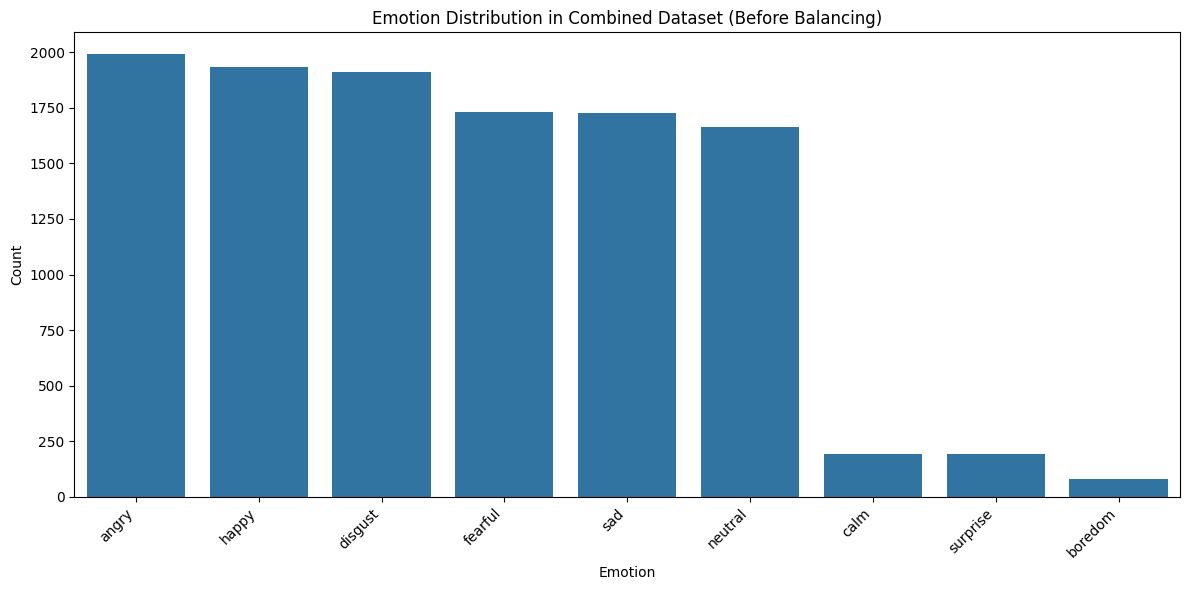

In [6]:
import matplotlib.pyplot as plt
import seaborn as sns

tess_df.rename(columns={'Path': 'path'}, inplace=True)
crema_df.rename(columns={'Path': 'path'}, inplace=True)
emodb_df.rename(columns={'Path': 'path'}, inplace=True)

combined_df = pd.concat([ravdess_df, crema_df, tess_df, emodb_df], ignore_index=True)

csv_output_path = r'C:\Users\manas\OneDrive\Desktop\audio_dataset\combined_dataset.csv'
combined_df.to_csv(csv_output_path, index=False)

print(f"Combined dataframe saved to: {csv_output_path}")

plt.figure(figsize=(12, 6))
sns.countplot(data=combined_df, x='Emotions', order=combined_df['Emotions'].value_counts().index)
plt.title('Emotion Distribution in Combined Dataset (Before Balancing)')
plt.xlabel('Emotion')
plt.ylabel('Count')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

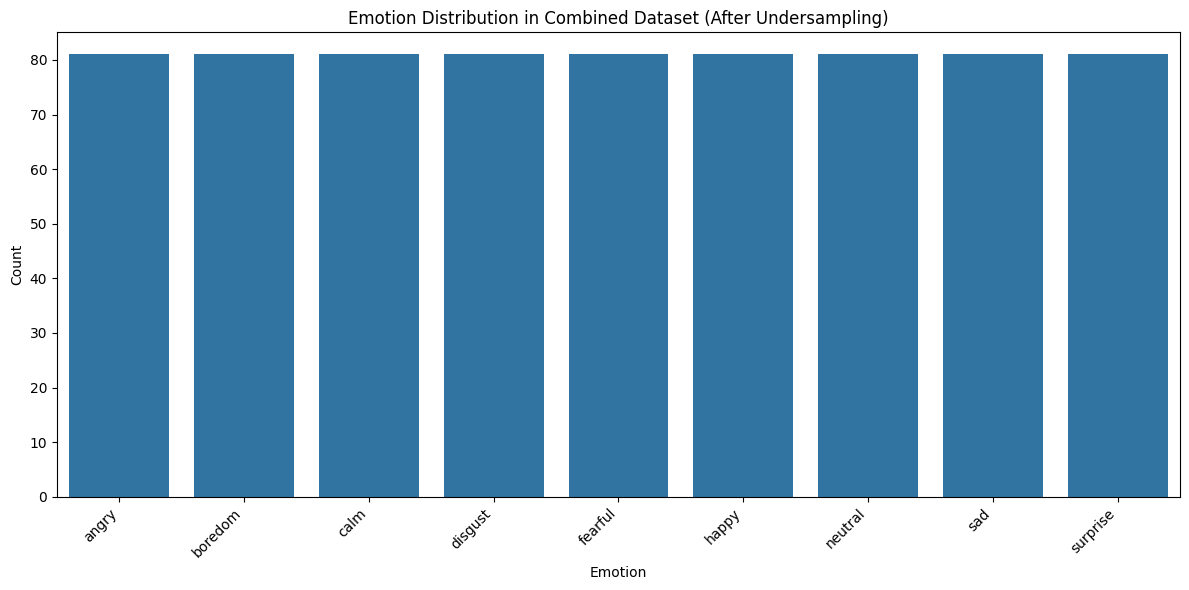

In [7]:
from imblearn.over_sampling import RandomOverSampler
from imblearn.under_sampling import RandomUnderSampler

X = combined_df.drop('Emotions', axis=1)
y = combined_df['Emotions']

undersampler = RandomUnderSampler(random_state=42)
X_resampled_under, y_resampled_under = undersampler.fit_resample(X, y)
undersampled_df = pd.DataFrame({'Emotions': y_resampled_under, 'path': X_resampled_under['path']})

plt.figure(figsize=(12, 6))
sns.countplot(data=undersampled_df, x='Emotions', order=undersampled_df['Emotions'].value_counts().index)
plt.title('Emotion Distribution in Combined Dataset (After Undersampling)')
plt.xlabel('Emotion')
plt.ylabel('Count')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

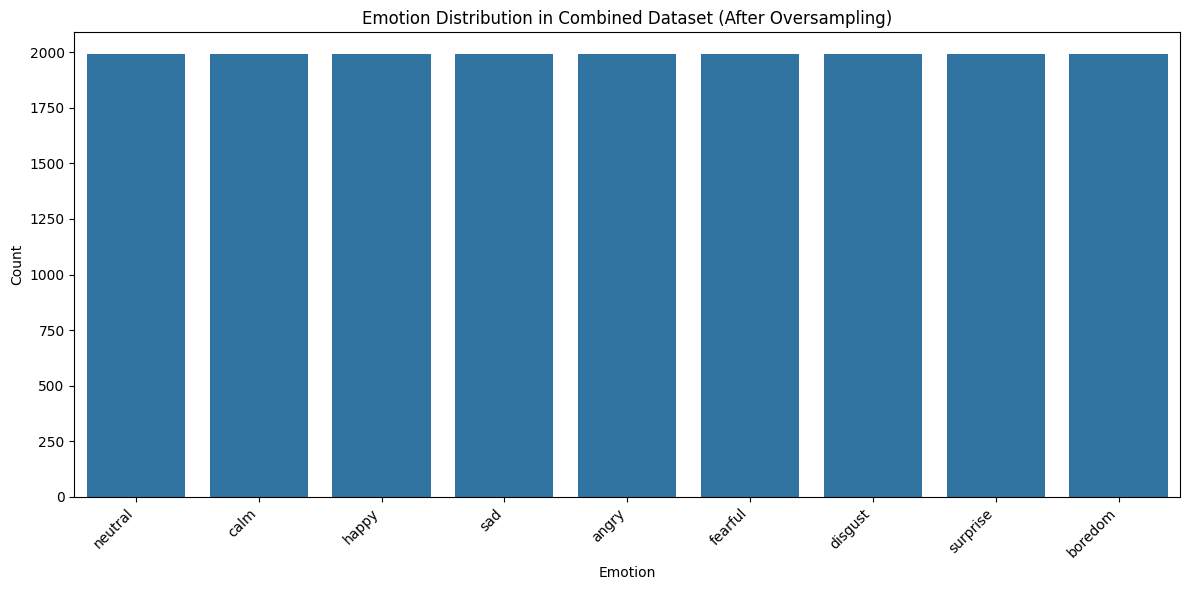

In [8]:
oversampler = RandomOverSampler(random_state=42)
X_resampled_over, y_resampled_over = oversampler.fit_resample(X, y)
oversampled_df = pd.DataFrame({'Emotions': y_resampled_over, 'path': X_resampled_over['path']})

plt.figure(figsize=(12, 6))
sns.countplot(data=oversampled_df, x='Emotions', order=oversampled_df['Emotions'].value_counts().index)
plt.title('Emotion Distribution in Combined Dataset (After Oversampling)')
plt.xlabel('Emotion')
plt.ylabel('Count')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

csv_output_path = r'C:\Users\manas\OneDrive\Desktop\audio_dataset\oversampled_dataset.csv'
oversampled_df.to_csv(csv_output_path, index=False)

In [9]:
print(oversampled_df['Emotions'].value_counts()) 

Emotions
neutral     1990
calm        1990
happy       1990
sad         1990
angry       1990
fearful     1990
disgust     1990
surprise    1990
boredom     1990
Name: count, dtype: int64


In [12]:
import librosa
import numpy as np
from tqdm import tqdm

SR = 22050 # Standard sample rate

def extract_mfcc(audio_path, sr=SR, n_mfcc=40):
    """
    Extracts MFCC features from an audio file.

    Args:
        audio_path (str): Path to the audio file.
        sr (int): Target sampling rate for resampling.
        n_mfcc (int): Number of MFCC coefficients to extract.

    Returns:
        numpy.ndarray: Extracted MFCC features, or None if an error occurs.
    """
    try:
        y, sr = librosa.load(audio_path, sr=sr)
        
        mfccs = librosa.feature.mfcc(y=y, sr=sr, n_mfcc=n_mfcc)

        mfccs = mfccs.T
        return mfccs
    except Exception as e:
        print(f"Error processing {audio_path}: {e}")
        return None

mfcc_features = []

feature_labels = []

for index, row in tqdm(oversampled_df.iterrows(), total=len(oversampled_df), desc="Extracting MFCCs"):
    audio_path = row['path']
    emotion = row['Emotions'] 

    mfcc = extract_mfcc(audio_path, sr=SR)

    if mfcc is not None:
        mfcc_features.append(mfcc)
        feature_labels.append(emotion)

print(f"\nSuccessfully extracted MFCCs from {len(mfcc_features)} audio files.")
print(f"Example MFCC shape: {mfcc_features[0].shape if mfcc_features else 'N/A'}")

feature_df = pd.DataFrame({'MFCCs': mfcc_features, 'Emotions': feature_labels})
print(feature_df.head())

csv_output_path = r'C:\Users\manas\OneDrive\Desktop\audio_dataset\features.csv'
feature_df.to_csv(csv_output_path, index=False)

Extracting MFCCs: 100%|██████████████████████████████████████████████████████████| 17910/17910 [03:10<00:00, 94.20it/s]



Successfully extracted MFCCs from 17910 audio files.
Example MFCC shape: (143, 40)
                                               MFCCs Emotions
0  [[-857.35706, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0....  neutral
1  [[-864.93823, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0....  neutral
2  [[-849.8414, 8.887946, 8.699909, 8.395501, 7.9...  neutral
3  [[-838.64246, 6.9663467, 1.2958704, 2.0305989,...  neutral
4  [[-904.572, 3.5394292, 3.5027733, 3.4423473, 3...     calm


In [13]:
import tensorflow as tf
import numpy as np 
from sklearn.preprocessing import LabelEncoder
import joblib

max_frames = max([features.shape[0] for features in mfcc_features])
print(f"Maximum number of frames: {max_frames}")

n_mfcc = mfcc_features[0].shape[1] if mfcc_features else 13
print(f"Number of MFCC coefficients: {n_mfcc}")

X_features_padded = tf.keras.preprocessing.sequence.pad_sequences(
    mfcc_features,
    maxlen=max_frames,
    dtype='float32',
    truncating='post', 
    value=0.0
)

print("Padded MFCCs shape (X_features_padded):", X_features_padded.shape) 

label_encoder = LabelEncoder()
y_labels_encoded = label_encoder.fit_transform(feature_labels)

print(f"\nShape of the final feature matrix X (X_features_padded): {X_features_padded.shape}")
print(f"Shape of the final label vector y (y_labels_encoded): {y_labels_encoded.shape}")
print(f"Emotion to Encoded Label Mapping:")
for emotion, label in zip(label_encoder.classes_, label_encoder.transform(label_encoder.classes_)):
    print(f"{emotion}: {label}")
    
X = X_features_padded
y = y_labels_encoded

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.2, stratify=y, random_state=42)
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, stratify=y_temp, random_state=42)

original_shape_train = X_train.shape
original_shape_val = X_val.shape
original_shape_test = X_test.shape

X_train_reshaped = X_train.reshape(-1, X_train.shape[-1])
X_val_reshaped = X_val.reshape(-1, X_val.shape[-1])
X_test_reshaped = X_test.reshape(-1, X_test.shape[-1])

scaler = StandardScaler()
scaler.fit(X_train_reshaped)

joblib.dump(scaler, 'mfcc_scaler.pkl')

X_train_scaled = scaler.transform(X_train_reshaped).reshape(original_shape_train)
X_val_scaled = scaler.transform(X_val_reshaped).reshape(original_shape_val)
X_test_scaled = scaler.transform(X_test_reshaped).reshape(original_shape_test)

np.save("X_train_scaled.npy", X_train_scaled)
np.save("X_val_scaled.npy", X_val_scaled)
np.save("X_test_scaled.npy", X_test_scaled)
np.save("y_train.npy", y_train)
np.save("y_val.npy", y_val)
np.save("y_test.npy", y_test)

print("\nAll data preparation steps completed and saved successfully!")

Maximum number of frames: 387
Number of MFCC coefficients: 40
Padded MFCCs shape (X_features_padded): (17910, 387, 40)

Shape of the final feature matrix X (X_features_padded): (17910, 387, 40)
Shape of the final label vector y (y_labels_encoded): (17910,)
Emotion to Encoded Label Mapping:
angry: 0
boredom: 1
calm: 2
disgust: 3
fearful: 4
happy: 5
neutral: 6
sad: 7
surprise: 8

All data preparation steps completed and saved successfully!


In [14]:
import numpy as np
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv1D, MaxPooling1D, LSTM, Dense, Dropout, BatchNormalization, Input, Bidirectional 
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint

X_train = np.load("X_train_scaled.npy")
X_val = np.load("X_val_scaled.npy")
X_test = np.load("X_test_scaled.npy")
y_train = np.load("y_train.npy")
y_val = np.load("y_val.npy")
y_test = np.load("y_test.npy")

# One-hot encode labels
num_classes = len(np.unique(y_train))
y_train_cat = to_categorical(y_train, num_classes)
y_val_cat = to_categorical(y_val, num_classes)
y_test_cat = to_categorical(y_test, num_classes)

In [19]:
# Input shape
input_shape = X_train.shape[1:]

model = Sequential([
    Input(shape=input_shape),

    Conv1D(filters=64, kernel_size=5, activation='relu', padding='same'),
    BatchNormalization(),
    MaxPooling1D(pool_size=2),
    Dropout(0.3),

    Conv1D(filters=128, kernel_size=5, activation='relu', padding='same'),
    BatchNormalization(),
    MaxPooling1D(pool_size=2),
    Dropout(0.3),

    Conv1D(filters=256, kernel_size=3, activation='relu', padding='same'),
    BatchNormalization(),
    MaxPooling1D(pool_size=2),
    Dropout(0.3),

    Bidirectional(LSTM(128, return_sequences=True)), 
    Dropout(0.3),

    Bidirectional(LSTM(128, return_sequences=False)),
    Dropout(0.3),

    # Dense Layers
    Dense(128, activation='relu'),
    BatchNormalization(),
    Dropout(0.4),

    # Output Layer
    Dense(num_classes, activation='softmax')
])

model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

model.summary()


Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv1d_6 (Conv1D)                    │ (None, 387, 64)             │          12,864 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_8                │ (None, 387, 64)             │             256 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling1d_6 (MaxPooling1D)       │ (None, 193, 64)             │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_12 (Dropout)                 │ (None, 193, 64)             │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv1d_7 (Conv1D)                    │ (None, 193, 128)            │          41,088 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_9                │ (None, 193, 128)            │             512 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling1d_7 (MaxPooling1D)       │ (None, 96, 128)             │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_13 (Dropout)                 │ (None, 96, 128)             │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv1d_8 (Conv1D)                    │ (None, 96, 256)             │          98,560 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_10               │ (None, 96, 256)             │           1,024 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling1d_8 (MaxPooling1D)       │ (None, 48, 256)             │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_14 (Dropout)                 │ (None, 48, 256)             │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ bidirectional (Bidirectional)        │ (None, 48, 256)             │         394,240 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_15 (Dropout)                 │ (None, 48, 256)             │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ bidirectional_1 (Bidirectional)      │ (None, 256)                 │         394,240 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_16 (Dropout)                 │ (None, 256)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_4 (Dense)                      │ (None, 128)                 │          32,896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_11               │ (None, 128)                 │             512 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_17 (Dropout)                 │ (None, 128)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼──────────────

 Total params: 977,353 (3.73 MB)

 Trainable params: 976,201 (3.72 MB)

 Non-trainable params: 1,152 (4.50 KB)

In [20]:
early_stopping = EarlyStopping(monitor='val_loss', patience=15, restore_best_weights=True, verbose=1)
model_checkpoint = ModelCheckpoint(filepath=r'C:\Users\manas\OneDrive\Desktop\audio_dataset\best_cnn_lstm_emotion_model(2).keras',
                                   monitor='val_accuracy',
                                   save_best_only=True,
                                   mode='max',
                                   verbose=1)

# Train the model
history = model.fit(X_train, y_train_cat,
                    validation_data=(X_val, y_val_cat),
                    epochs=100,
                    batch_size=32,
                    callbacks=[early_stopping, model_checkpoint],
                    verbose=1)

print("\nModel training complete!")

Epoch 1/100
448/448 ━━━━━━━━━━━━━━━━━━━━ 0s 154ms/step - accuracy: 0.3927 - loss: 1.8336  
Epoch 1: val_accuracy improved from -inf to 0.60302, saving model to C:\Users\manas\OneDrive\Desktop\audio_dataset\best_cnn_lstm_emotion_model(2).keras
448/448 ━━━━━━━━━━━━━━━━━━━━ 80s 165ms/step - accuracy: 0.3929 - loss: 1.8328 - val_accuracy: 0.6030 - val_loss: 1.0961
Epoch 2/100
448/448 ━━━━━━━━━━━━━━━━━━━━ 0s 142ms/step - accuracy: 0.6062 - loss: 1.1165  
Epoch 2: val_accuracy improved from 0.60302 to 0.68398, saving model to C:\Users\manas\OneDrive\Desktop\audio_dataset\best_cnn_lstm_emotion_model(2).keras
448/448 ━━━━━━━━━━━━━━━━━━━━ 68s 153ms/step - accuracy: 0.6062 - loss: 1.1165 - val_accuracy: 0.6840 - val_loss: 0.8668
Epoch 3/100
448/448 ━━━━━━━━━━━━━━━━━━━━ 0s 146ms/step - accuracy: 0.6657 - loss: 0.9514  
Epoch 3: val_accuracy improved from 0.68398 to 0.69626, saving model to C:\Users\manas\OneDrive\Desktop\audio_dataset\best_cnn_lstm_emotion_model(2).keras
448/448 ━━━━━━━━━━━━━━━━━

In [14]:
from tensorflow.keras.models import load_model
from sklearn.metrics import classification_report, confusion_matrix
import numpy as np

model_path = r'C:\Users\manas\OneDrive\Desktop\audio_dataset\best_cnn_lstm_emotion_model(2).keras'
best_model = load_model(model_path)

X_test = np.load("X_test_scaled.npy")
y_test = np.load("y_test.npy")

from tensorflow.keras.utils import to_categorical
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
le.fit(y_train)

y_test_enc = le.transform(y_test)
y_test_cat = to_categorical(y_test_enc)

# Evaluate model
test_loss, test_accuracy = best_model.evaluate(X_test, y_test_cat, verbose=1)
print(f"\n✅ Test Accuracy: {test_accuracy:.4f}")


56/56 ━━━━━━━━━━━━━━━━━━━━ 9s 136ms/step - accuracy: 0.8102 - loss: 0.5424

✅ Test Accuracy: 0.8057


56/56 ━━━━━━━━━━━━━━━━━━━━ 8s 140ms/step

📊 Classification Report:
              precision    recall  f1-score   support

           0       0.82      0.75      0.78       199
           1       0.99      1.00      0.99       199
           2       0.99      1.00      1.00       199
           3       0.76      0.62      0.68       199
           4       0.65      0.66      0.66       199
           5       0.73      0.62      0.67       199
           6       0.70      0.81      0.75       199
           7       0.65      0.79      0.71       199
           8       0.99      1.00      0.99       199

    accuracy                           0.81      1791
   macro avg       0.81      0.81      0.80      1791
weighted avg       0.81      0.81      0.80      1791



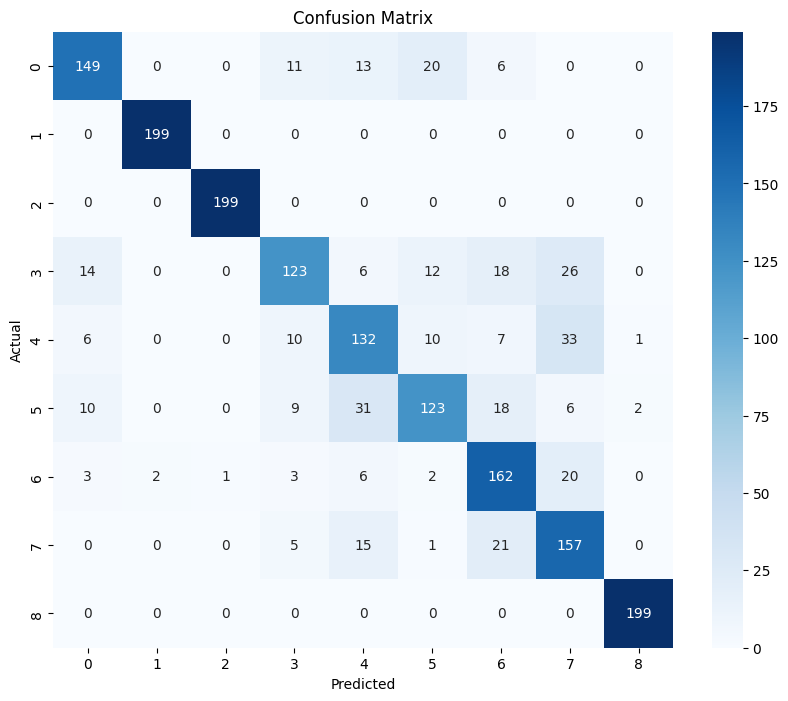

In [15]:
# Predict probabilities
y_pred_probs = best_model.predict(X_test)

# Convert to class indices
y_pred = np.argmax(y_pred_probs, axis=1)
y_true = np.argmax(y_test_cat, axis=1)

print("\n📊 Classification Report:")
print(classification_report(y_true, y_pred, target_names=[str(cls) for cls in le.classes_]))


# Confusion Matrix
import seaborn as sns
import matplotlib.pyplot as plt
cm = confusion_matrix(y_true, y_pred)

plt.figure(figsize=(10, 8))
sns.heatmap(cm, annot=True, fmt='d', xticklabels=le.classes_, yticklabels=le.classes_, cmap='Blues')
plt.title("Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

In [28]:
import librosa
import numpy as np
import tensorflow as tf
from tensorflow.keras.models import load_model
from sklearn.preprocessing import LabelEncoder
import joblib
import os

SAMPLE_RATE = 22050
N_MFCC = 40
MAX_FRAMES = 174

EMOTION_MAP = {
    0: 'angry',
    1: 'boredom',
    2: 'calm',
    3: 'disgust',
    4: 'fearful',
    5: 'happy',
    6: 'neutral',
    7: 'sad',
    8: 'surprise'
}
model_path = r'C:\Users\manas\OneDrive\Desktop\audio_dataset\best_cnn_lstm_emotion_model.keras'
best_model = load_model(model_path)
print(f"Model loaded successfully from: {model_path}")

scaler_path = 'mfcc_scaler.pkl'
if os.path.exists(scaler_path):
    scaler = joblib.load(scaler_path)
    print(f"StandardScaler loaded successfully from: {scaler_path}")
else:
    print(f"Error: StandardScaler not found at {scaler_path}. You must save your scaler during data preprocessing.")
    print("Cannot reliably preprocess new audio without the original scaler.")
    exit()

y_train = np.load("y_train.npy")
le = LabelEncoder()
le.fit(y_train)
class_names_numeric = le.classes_ 

print(f"Numeric Emotion classes (as learned by LabelEncoder): {class_names_numeric}")
print(f"Mapped Emotion Names: {[EMOTION_MAP[int(label)] for label in class_names_numeric]}")

def preprocess_audio_for_prediction(audio_path, sr=SAMPLE_RATE, n_mfcc=N_MFCC, max_frames=MAX_FRAMES, scaler=None):
    try:
        audio, sr = librosa.load(audio_path, sr=sr)
        mfccs = librosa.feature.mfcc(y=audio, sr=sr, n_mfcc=n_mfcc)
        mfccs = np.transpose(mfccs)

        if mfccs.shape[0] < max_frames:
            pad_width = max_frames - mfccs.shape[0]
            mfccs = np.pad(mfccs, ((0, pad_width), (0, 0)), mode='constant')
        else:
            mfccs = mfccs[:max_frames, :]
            
        if scaler is not None:
            mfccs_scaled = scaler.transform(mfccs.reshape(-1, mfccs.shape[-1]))
            mfccs_scaled = mfccs_scaled.reshape(1, max_frames, n_mfcc) # Add batch dimension
        else:
            print("Warning: No scaler provided. MFCCs not scaled.")
            mfccs_scaled = mfccs.reshape(1, max_frames, n_mfcc) # Add batch dimension

        return mfccs_scaled

    except Exception as e:
        print(f"Error processing audio file {audio_path}: {e}")
        return None
        
audio_file_path = r"C:\Users\manas\OneDrive\Desktop\audio_dataset\RAVDESS\audio_speech_actors_01-24\Actor_07\03-01-01-01-01-01-07.wav"

mfccs_for_prediction = preprocess_audio_for_prediction(
    audio_file_path,
    sr=SAMPLE_RATE,
    n_mfcc=N_MFCC,
    max_frames=MAX_FRAMES,
    scaler=scaler
)

if mfccs_for_prediction is not None:
    predictions = best_model.predict(mfccs_for_prediction)
    predicted_probabilities = predictions[0]
    predicted_class_index = np.argmax(predicted_probabilities)
    confidence = predicted_probabilities[predicted_class_index]
    predicted_emotion_name = EMOTION_MAP[predicted_class_index]

    print(f"\n--- Prediction for {os.path.basename(audio_file_path)} ---")
    print(f"Predicted Emotion: {predicted_emotion_name}")
    print(f"Confidence: {confidence:.4f}")
    print("\nAll Probabilities:")
    for i, prob in enumerate(predicted_probabilities):
        emotion_name_for_prob = EMOTION_MAP[i]
        print(f"  {emotion_name_for_prob}: {prob:.4f}")

else:
    print("Could not make a prediction due to preprocessing error.")

Model loaded successfully from: C:\Users\manas\OneDrive\Desktop\audio_dataset\best_cnn_lstm_emotion_model.keras
StandardScaler loaded successfully from: mfcc_scaler.pkl
Numeric Emotion classes (as learned by LabelEncoder): [0 1 2 3 4 5 6 7 8]
Mapped Emotion Names: ['angry', 'boredom', 'calm', 'disgust', 'fearful', 'happy', 'neutral', 'sad', 'surprise']
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 373ms/step

--- Prediction for 03-01-01-01-01-01-07.wav ---
Predicted Emotion: calm
Confidence: 0.9995

All Probabilities:
  angry: 0.0000
  boredom: 0.0001
  calm: 0.9995
  disgust: 0.0000
  fearful: 0.0000
  happy: 0.0000
  neutral: 0.0001
  sad: 0.0001
  surprise: 0.0001
